In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
large_df = pd.read_csv('large_resistance_acc.txt', sep='\t')
deeparg_df = pd.read_csv('deeparg_resistance_acc.txt', sep='\t')
method3_df = pd.read_csv('plm_resistance_acc.txt', sep='\t')
method4_df = pd.read_csv('rgi_resistance_acc.txt', sep='\t')

In [9]:
metrics = ['Precision', 'Accuracy', 'F1_Score', 'Recall']

In [10]:
def prepare_data(df, method_name, metrics):
    temp_df = df[['Resistance_Category'] + metrics].copy()
    temp_df['Method'] = method_name
    return temp_df

In [11]:
combined_df = pd.concat([
    prepare_data(large_df, 'FGBERT', metrics),
    prepare_data(deeparg_df, 'DeepARG', metrics),
    prepare_data(method3_df, 'PLMARG', metrics),
    prepare_data(method4_df, 'RGI', metrics)
], axis=0)

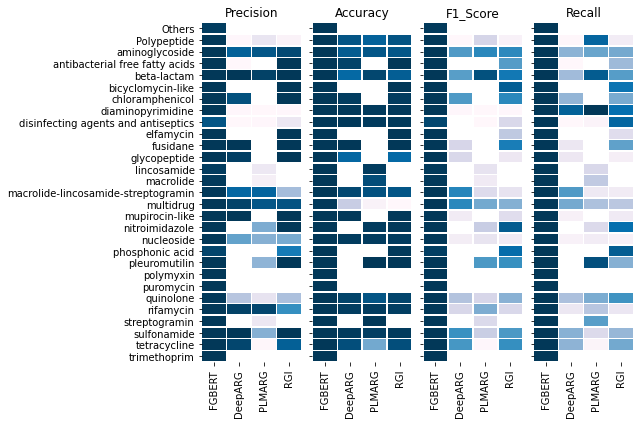

In [12]:
pivot_df = combined_df.pivot_table(index='Resistance_Category', columns='Method', values=metrics)
# print(pivot_df)
pivot_df = pivot_df.reindex(columns=['FGBERT', 'DeepARG', 'PLMARG', 'RGI'], level=1)
fig, axes = plt.subplots(1, len(metrics), figsize=(9, 6), sharey=True)

for i, metric in enumerate(metrics):
    ax = sns.heatmap(pivot_df[metric], cmap="PuBu", ax=axes[i], cbar=False, linewidths=0.5)
    ax.set_title(metric)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if i == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('')
    if i != len(metrics) - 1:
        ax.set_yticklabels([])

plt.tight_layout()
plt.savefig(f'./Resistance_performance_heatmap_fullmetric.pdf')